In [1]:
import numpy as np
import pandas as pd

In [3]:
# Reading Data into DataFrame
sat_score=pd.read_csv(r"C:\Users\dhill\Downloads\Python statistics by Duo Analyst\sat_score.csv")
sat_score

,student_id,score
0,1001,1020
1,1002,1220
2,1003,613
3,1004,725
4,1005,543
...,...,...
495,1496,671
496,1497,1085
497,1498,1316
498,1499,981


In [14]:
#Calculate mean and standard deviation of SAT score
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu=sat_score['score'].mean()
sigma=sat_score['score'].std()
print("Mean :", round(mu,2))
print("Standard Deviation :", round(sigma,2))


Mean : 1001.63
Standard Deviation : 209.38


In [15]:
# Create a range of x values and calculate the corresponding PDF
x_values=np.linspace(sat_score['score'].min(),sat_score['score'].max(),100)
x_values

array([ 375.        ,  386.67676768,  398.35353535,  410.03030303,
        421.70707071,  433.38383838,  445.06060606,  456.73737374,
        468.41414141,  480.09090909,  491.76767677,  503.44444444,
        515.12121212,  526.7979798 ,  538.47474747,  550.15151515,
        561.82828283,  573.50505051,  585.18181818,  596.85858586,
        608.53535354,  620.21212121,  631.88888889,  643.56565657,
        655.24242424,  666.91919192,  678.5959596 ,  690.27272727,
        701.94949495,  713.62626263,  725.3030303 ,  736.97979798,
        748.65656566,  760.33333333,  772.01010101,  783.68686869,
        795.36363636,  807.04040404,  818.71717172,  830.39393939,
        842.07070707,  853.74747475,  865.42424242,  877.1010101 ,
        888.77777778,  900.45454545,  912.13131313,  923.80808081,
        935.48484848,  947.16161616,  958.83838384,  970.51515152,
        982.19191919,  993.86868687, 1005.54545455, 1017.22222222,
       1028.8989899 , 1040.57575758, 1052.25252525, 1063.92929

In [16]:
# Probability density function
pdf_values=norm.pdf(x_values,mu,sigma)
pdf_values

array([2.16239532e-05, 2.55122192e-05, 3.00061740e-05, 3.51821398e-05,
       4.11228417e-05, 4.79173978e-05, 5.56612012e-05, 6.44556754e-05,
       7.44078908e-05, 8.56300239e-05, 9.82386480e-05, 1.12353842e-04,
       1.28098110e-04, 1.45595099e-04, 1.64968123e-04, 1.86338480e-04,
       2.09823586e-04, 2.35534919e-04, 2.63575804e-04, 2.94039055e-04,
       3.27004506e-04, 3.62536467e-04, 4.00681138e-04, 4.41464047e-04,
       4.84887539e-04, 5.30928387e-04, 5.79535589e-04, 6.30628386e-04,
       6.84094599e-04, 7.39789304e-04, 7.97533942e-04, 8.57115883e-04,
       9.18288513e-04, 9.80771870e-04, 1.04425387e-03, 1.10839210e-03,
       1.17281630e-03, 1.23713133e-03, 1.30092081e-03, 1.36375123e-03,
       1.42517662e-03, 1.48474361e-03, 1.54199683e-03, 1.59648462e-03,
       1.64776486e-03, 1.69541092e-03, 1.73901751e-03, 1.77820642e-03,
       1.81263197e-03, 1.84198605e-03, 1.86600275e-03, 1.88446234e-03,
       1.89719464e-03, 1.90408159e-03, 1.90505912e-03, 1.90011814e-03,
      

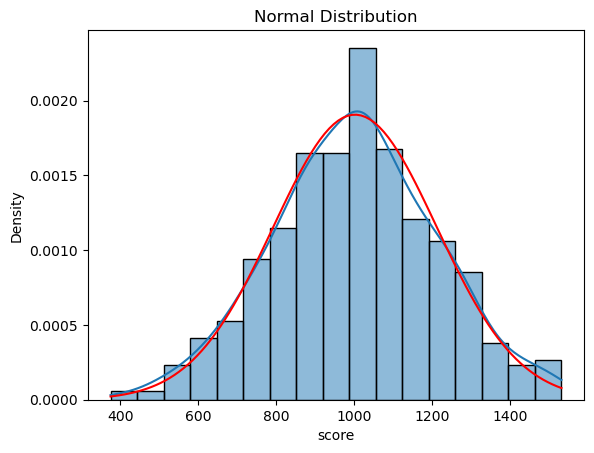

In [25]:
# Plot the data distribution and overlay the PDF
import matplotlib.pyplot as plt
import seaborn as ns
plt.figure()
ns.histplot(sat_score['score'],kde=True, stat='density')
plt.plot(x_values,pdf_values,color='red')

# stat str
# Aggregate statistic to compute in each bin.

#         count: show the number of observations in each bin

#         frequency: show the number of observations divided by the bin width

#         probability or proportion: normalize such that bar heights sum to 1

#         percent: normalize such that bar heights sum to 100

#         density: normalize such that the total area of the histogram equals 1

# kde bool

#     If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). 
#     Only relevant with univariate data.

plt.title("Normal Distribution")
plt.show()

In [29]:
# 1. Calculate the probability that a student will score more than 1200 in SAT exam
# find the cumulative probability and subtract it from 1 to calculate the probability that a student will score more than 1200

prob_greater_than_1200 = 1-norm.cdf(1200, mu, sigma)
print(round(prob_greater_than_1200,4))

0.1717


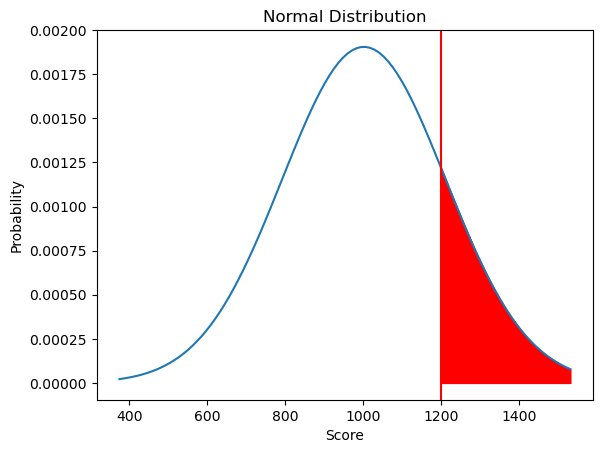

In [36]:
# Plot the probability distribution
plt.plot(x_values,pdf_values)
plt.axvline(x=1200, c="r")
x1=np.linspace(1200,x_values.max(),50)
plt.fill_between(x1, norm.pdf(x1,mu,sigma),color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [37]:
# 2. Calculate the minimum marks a student must score in order to secure 90th percentile
# calculate the 90th percentile score using ppf() function
# norm.ppf() calculates the percentile point
score_90th_percentile = norm.ppf(0.90, mu, sigma)
print("The 90th percentile score should be", round(score_90th_percentile))

The 90th percentile score should be 1270


In [38]:
# 3. Calculate the minimum marks a student must score in order to be in the top 5%
# calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)
print("The minimum score to be in top 5% should be", round(score_top_five_percent))

The minimum score to be in top 5% should be 1346


(<Figure size 1200x400 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       dtype=object))

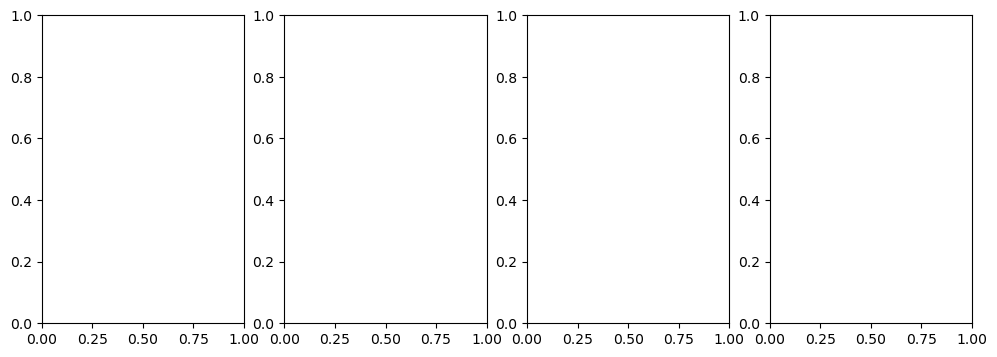

In [46]:
# plot the two distribution for SAT and ACT scores
from scipy.stats import norm
plt.subplots(1,4,figsize=(12,4))

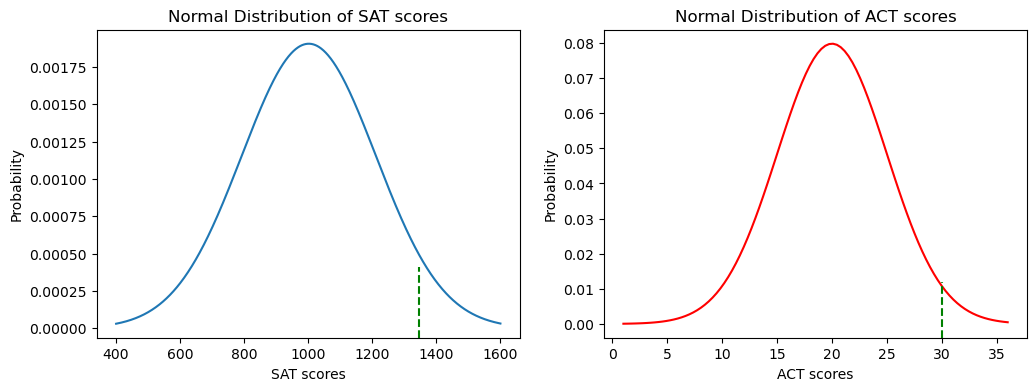

In [67]:
# plot the two distribution for SAT and ACT scores
from scipy.stats import norm
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x,norm.pdf(x,loc=1001.63,scale=209.38))
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')
ax1.axvline(1346,ymax=0.23, linestyle='--',c='g')
x1 = np.linspace(1, 36, 100)
ax2.plot(x1,norm.pdf(x1,loc=20,scale=5), color = 'r')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'green')
plt.show()

In [68]:
# find the Z-score of highest scorer in SAT among all the applicants
top_sat = (1346 - 1001.63) / 209.38
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
# find the Z-score of highest scorer in ACT among all the applicants
top_act = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

The Z-score of highest scorer in SAT among all the applicants 1.6447129620785177
The Z-score of highest scorer in ACT among all the applicants 2.0


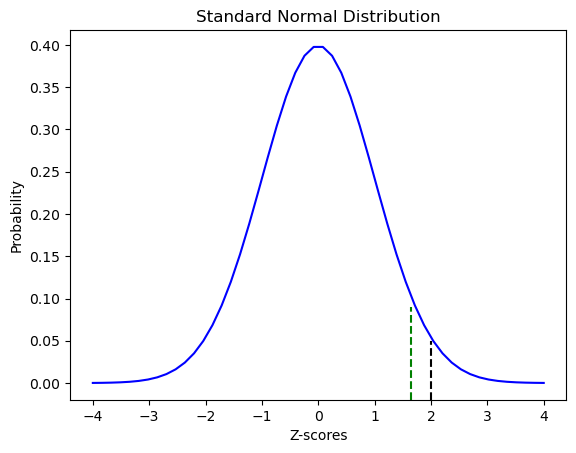

In [72]:
# plot the standard normal distribution and visualize the standardized scores
# We are plotting the distributions here to better visualize the calculations.
fig, ax = plt.subplots()
x = np.linspace(-4,4,50)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.axvline(top_sat, ymax = 0.25, linestyle = '--', color = 'green')
ax.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

In [83]:
# Kurtosis

import numpy as np
from scipy.stats import kurtosis

# Generate some data
data = np.random.normal(0, 1, 1000)

# Calculate kurtosis
kurt_value = kurtosis(data, fisher=True)  # Fisher's definition, subtracts 3 from the result
print("Kurtosis:", kurt_value)

Kurtosis: -0.142895457494999


In [1]:
#import the important packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import scipy.stats as stats

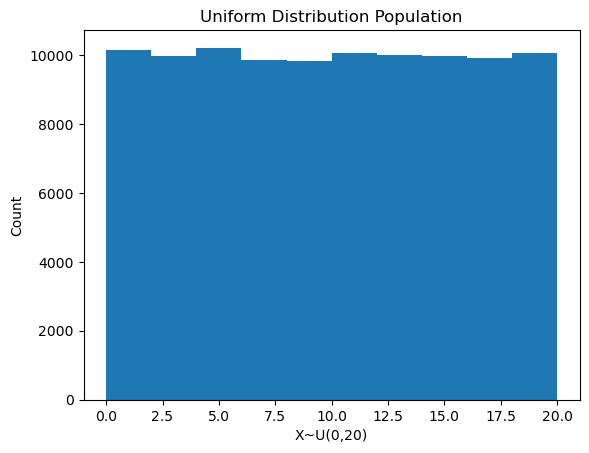

In [2]:
# Uniform Distribution
# importing the required function
from scipy.stats import uniform

# setting the seed for reproducibility
np.random.seed(1)
# creating a uniform distribution population of size 100000
uniform_pop = uniform.rvs(0, 20, size=100000)

plt.hist(uniform_pop)
plt.title("Uniform Distribution Population")
plt.xlabel("X~U(0,20)")
plt.ylabel("Count")
plt.show()

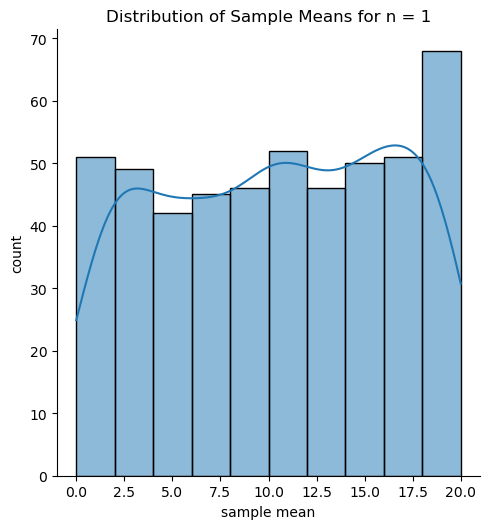

In [3]:
#Sample Distribution from this population for n=1

# set the seed for reproducibility
np.random.seed(1)

n = 1
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    
    sample = np.random.choice(uniform_pop, size=n)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

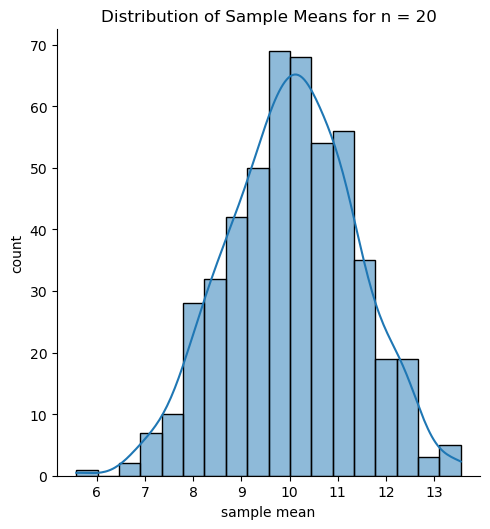

In [5]:
#Sample Distribution from this population for n=20

# set the seed for reproducibility
np.random.seed(1)

n = 20
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    
    sample = np.random.choice(uniform_pop, size=n)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

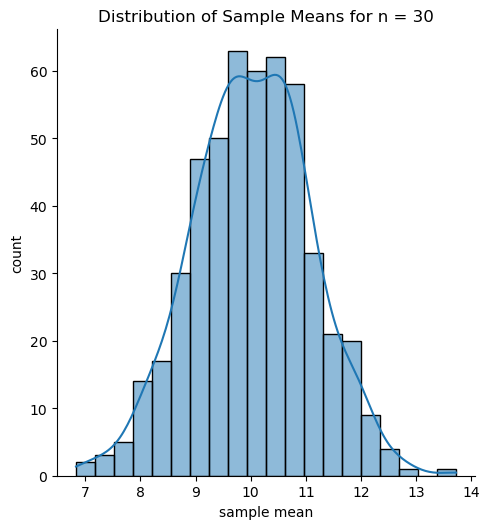

In [6]:
#Sample Distribution from this population for n=30

# set the seed for reproducibility
np.random.seed(1)

n = 30
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    
    sample = np.random.choice(uniform_pop, size=n)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

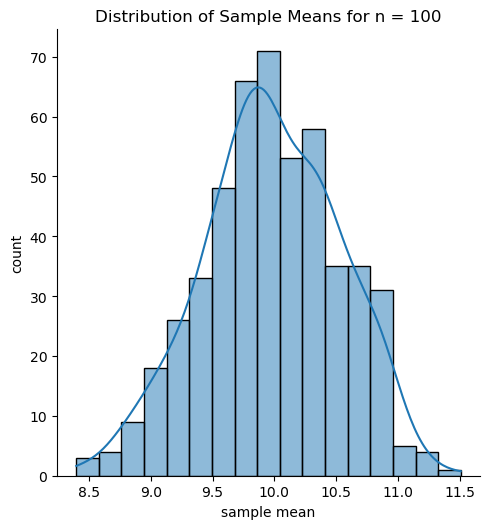

In [7]:
#for n=100

# set the seed for reproducibility
np.random.seed(1)

n = 100
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    
    sample = np.random.choice(uniform_pop, size=n)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

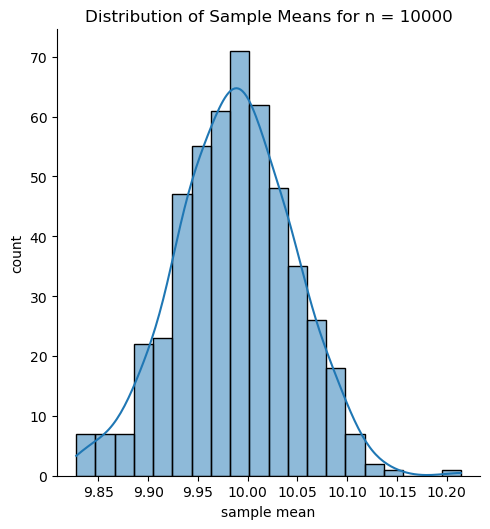

In [8]:
#for n=10000

# set the seed for reproducibility
np.random.seed(1)

n = 10000
# list to store sample means
sample_means = []
# iterate the loop to draw multiple samples
for j in range(500):
    
    sample = np.random.choice(uniform_pop, size=n)
    
    sample_mean = np.mean(sample)
    
    sample_means.append(sample_mean)
# plot the histogram of sample means
sns.displot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()
